# _h_-means

Heuristic clustering inspired by [_k_-means](https://en.wikipedia.org/wiki/K-means_clustering). As another demonstration of how continuous heuristics can be used.

### Set up IPython notebook environment first...

In [1]:
# Import path to source directory (bit of a hack in Jupyter)
import sys
import os
pwd = %pwd
sys.path.append(os.path.join(pwd, '../src'))

# Ensure modules are reloaded on any change (very useful when developing code on the fly)
get_ipython().magic('load_ext autoreload')
get_ipython().magic('autoreload 2')

In [2]:
# Import external libraries
import numpy as np

import matplotlib
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

# Objective function demonstration

In [3]:
from objfun import HMeans

In [4]:
of = HMeans()  

In [5]:
print('f* = {}'.format(of.fstar))

f* = 0.3084489218103048


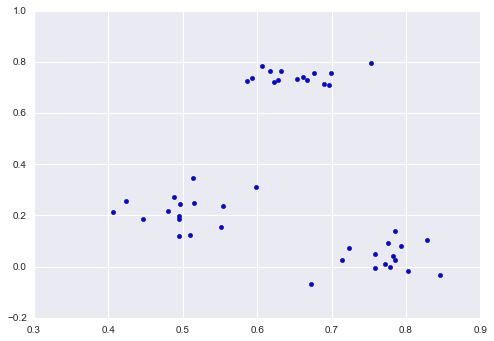

In [6]:
# plot the data proints
X = of.X
ax = plt.scatter(x=X[:, 0], y=X[:, 1])

In [7]:
print('a = {}'.format(of.a))
print('b = {}'.format(of.b))

a = [ 0.40569774 -0.06641667  0.40569774 -0.06641667  0.40569774 -0.06641667]
b = [ 0.84554749  0.79467683  0.84554749  0.79467683  0.84554749  0.79467683]


**Bounds are repeated for each centroid, that will be tuned by the heuristic.**

In [10]:
# some random evaluations
for i in range(10):
    x = of.generate_point()
    print('f({}) = {}'.format(x, of.evaluate(x)))

f([ 0.80989167  0.40346984  0.02443264  0.85683104  0.27429482  0.70910596]) = 6.050519176452423
f([ 0.35577234  0.79430906  0.84461886  0.53814752  0.55908652  0.12250998]) = 2.183432476474104
f([ 0.37764192  0.42874733  0.51120865  0.89176257  0.30021061  0.39644188]) = 6.334147396410055
f([ 0.79327323  0.41227608  0.18486755  0.84024732  0.5692714   0.06005021]) = 3.2263269161819847
f([ 0.98891697  0.22878233  0.61470171  0.36802668  0.80277594  0.62756185]) = 2.547698253957982
f([ 0.82121648  0.28825314  0.27479513  0.60105189  0.9385142   0.70729631]) = 4.047180069133727
f([ 0.26340316  0.12233592  0.45872423  0.9748125   0.68057437  0.19325373]) = 2.4767818015959024
f([ 0.04673923  0.95264394  0.85864902  0.82790318  0.96390052  0.59893645]) = 11.670283639075931
f([ 0.93091584  0.14676881  0.11396031  0.3720289   0.76656013  0.32114203]) = 4.846663622110576
f([ 0.63803508  0.0092211   0.54346504  0.33775465  0.89802431  0.94070704]) = 2.1539711522850644


In [11]:
# we can get cluster labels (for a random solution)
labels = of.get_cluster_labels(x)
print(labels)

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 1 0 1 1 1 1 1
 1 1 1 0 1 0 1 1]


In [12]:
# auxiliary routine
def visualize_solution(x, of):
    labels = of.get_cluster_labels(x)
    X = of.X
    ax = plt.scatter(x=X[:, 0], y=X[:, 1], c=labels)

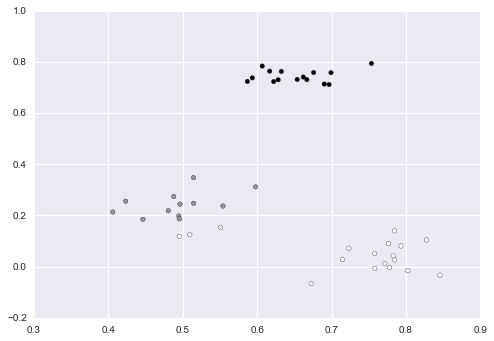

In [13]:
# visualization of a random solution
visualize_solution(x, of)

# Optimization demonstration

In [14]:
from heur_mutations import MirrorCorrection, CauchyMutation
from heur import FastSimulatedAnnealing

In [15]:
heur = FastSimulatedAnnealing(of, maxeval=10000, T0=10, n0=10, alpha=2, 
                              mutation=CauchyMutation(r=0.1, correction=MirrorCorrection(of)))
res = heur.search()
print('x_best = {}'.format(res['best_x']))
print('y_best = {}'.format(res['best_y']))
print('neval = {}'.format(res['neval']))

x_best = [ 0.60231572  0.75542795  0.78138002  0.03303465  0.5140592   0.26748931]
y_best = 0.2764327489899351
neval = 357


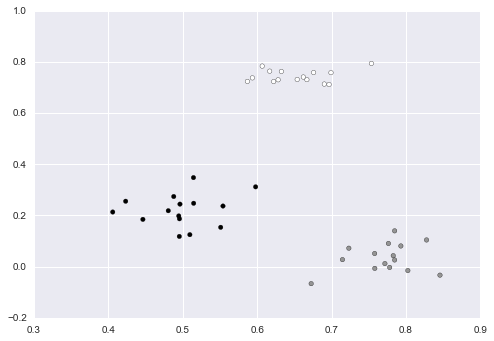

In [16]:
visualize_solution(res['best_x'], of)

## Excercises
* Tune heuristics for this objective function
* Tune this objective function, e.g. by penalization for smaller number of clusters than $h$ (and make sure you understand why this is possible)
* Compare heuristic approach to the original _k_-means